# Pretty please

## **Don't let your plots be default.** 
This code review will is about: multiple tools that are available for **making Figures** in python (at least the ones that I use); creating custom **colour-maps** and generating **interactive plots** with the **Bokeh** package

### Plotting tools:

[matplotlib](https://matplotlib.org/)
<br>
[seaborn](https://seaborn.pydata.org/)
<br>

### Colours and colour maps:

[Python colormaps](https://matplotlib.org/examples/color/colormaps_reference.html)
<br>
[iWantHue](http://tools.medialab.sciences-po.fr/iwanthue/)
<br>
[100 Color Combinations](https://designschool.canva.com/blog/100-color-combinations/)
<br>
[Flat](http://www.flatuicolorpicker.com/)

### Interactive plots:

[bokeh](https://bokeh.pydata.org/en/latest/)

And many, many, many, many more are out there.

# Why?

### Paper source: [ArXiv](https://arxiv.org/pdf/1711.04867.pdf)

Figure 4. | Figure B2.
:---: | :---:
![alt](example1.png) | ![alt](example.png)


### Paper source: [ArXiv](https://arxiv.org/abs/1710.01399v1)

![alt](Rainbow.png)



### Paper source: [ArXiv](https://arxiv.org/pdf/1604.00016v1.pdf)

Figure 9. | Figure 16.
:---: | :---:
![alt](ImageR.png) | ![alt](Shaded.png)

### Paper source: [ArXiv](https://arxiv.org/pdf/1706.05199.pdf)

Figure 4. (Here is only a half of the Figure)

![alt](NotOriginal.png)

Figure 6.
![alt](More.png)

# Colour maps
## seaborn.cubehelix_palette
[Cool colormaps](http://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn-cubehelix-palette): they are **pretty**, they **preserve information** if printed to black and white and they are **colorblind friendly**. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


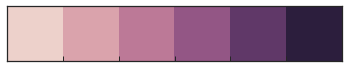

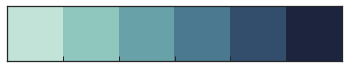

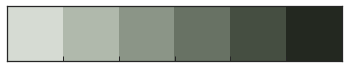

In [64]:
sns.palplot(sns.cubehelix_palette())
#sns.palplot(sns.cubehelix_palette(n_colors=6, start=0, rot=0.4, gamma=1.0,
#                              hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=False))

sns.palplot(sns.cubehelix_palette(rot=-.3))
sns.palplot(sns.cubehelix_palette(start=1.8, rot=0, hue=.2))

plt.show()

In [12]:
#help(sns.cubehelix_palette)

## Do it interactively: 

A Jupyter Widget

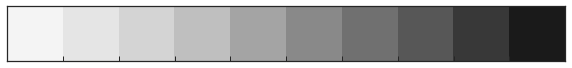

In [34]:
from ipywidgets import interact, FloatSlider
#data_type : {‘sequential’, ‘diverging’, ‘qualitative’}
sns.choose_colorbrewer_palette('sequential');
plt.show()

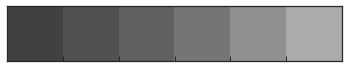

In [37]:
plt.show()

See maps, light to dark . Example and explanation of the arguments are taken from [Reference](https://edwards.sdsu.edu/research/python-dataviz-seaborn-heatmap-palettes/). Try to rotate map (rotate about the hue wheel).
<br>

**sns.palplot()**: Utility function to plot out these palettes
<br>
**n_colors**: Specify the number of unique colors to use in the palette
<br>
**start**: The starting hue value
<br>
**rot**: The number of rotations to go about the hue wheel over the course of the palette
<br>
**light**: Between 0 and 1, the intensity of the lightest color (start value)
<br>
**dark**: Between 0 and 1, the intensity of the darkest color (final value)


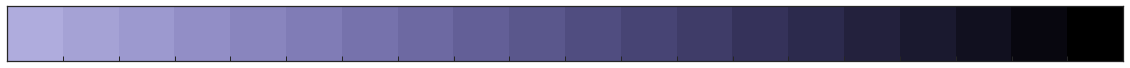

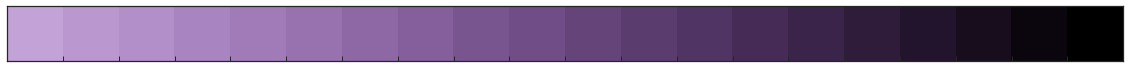

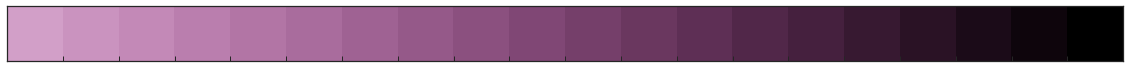

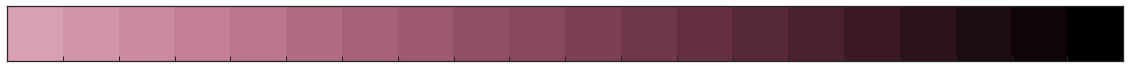

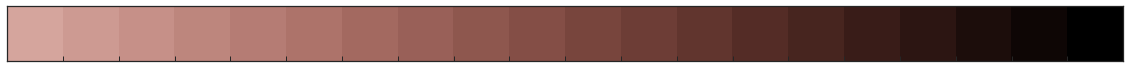

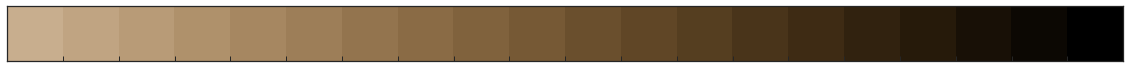

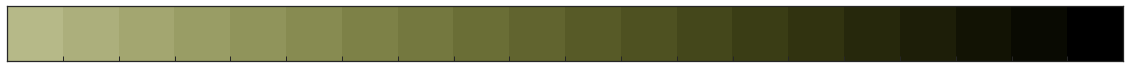

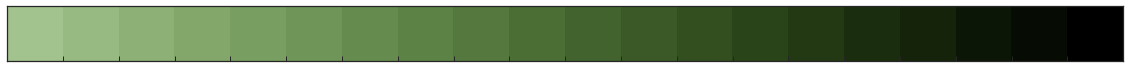

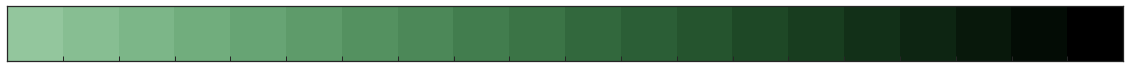

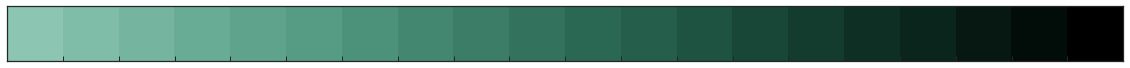

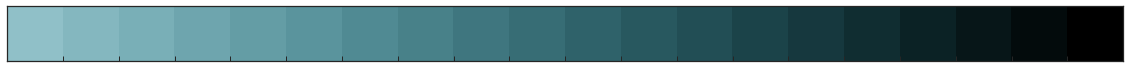

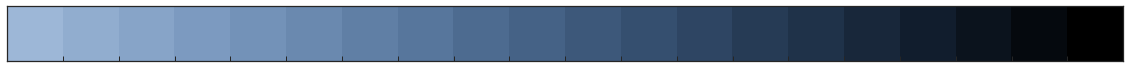

In [61]:
for x in np.arange(start=0, stop=3, step=0.25):
    sns.palplot(sns.cubehelix_palette(n_colors=20, start=x, rot=0, light=0.7, dark=0))
plt.show()

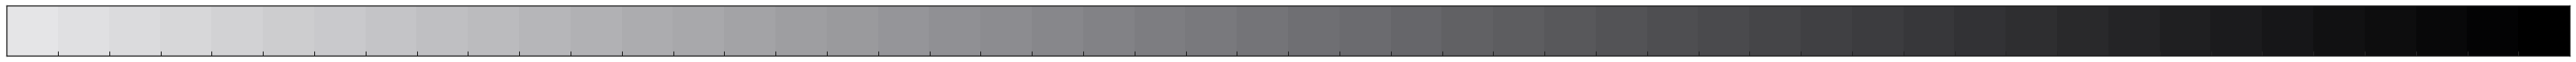

In [48]:
sns.palplot(sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0))
plt.show()


## There are plenty colors to pick from, make your own color-scheme, be consistent, love to look at your plots <3


# Rainbow vs. RdYlBu
### Moment 1 maps (Velocity maps; code is in the separate jupyter notebook together with the .fits files): 
This galaxy was part of the tutorial exercices at the Radio Astronomy School held in Harrabri 2017 - and as you can see, these are **not the final maps!**):

NGC253 | NGC253
:---: | :---:
![alt](ugly.png) | ![alt](RvsR2.png)

# Rainbow vs. Palette
## Column density contours; code is in the separate jupyter notebook together with the .fits files):

NGC253 | NGC253
:---: | :---:
![alt](RainbowCont.png) | ![alt](Pallete1.png)

# Make your own colourmap
For making these examples, recompiled catalogs of the Hickson Compact Groups (HCG) are used. References:
[Hickson P. 1982](http://cdsads.u-strasbg.fr/cgi-bin/nph-iarticle_query?1982ApJ...255..382H&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf); 
[Borthakur et. al 2010](http://iopscience.iop.org/article/10.1088/0004-637X/710/1/385/pdf); 
[Verdes-Montenegro et. al](https://www.aanda.org/articles/aa/pdf/2001/39/aah2853.pdf).


In [6]:
#Input files
MHI_Verdes, DEF_Verdes, GAP_Verdes, HCG = np.loadtxt('HCG_Verdes', usecols = (0,1,2,3), unpack=True)
MHI_Verdes_lim, DEF_Verdes_lim, GAP_Verdes_lim, HCG_lim = np.loadtxt('HCG_Verdes_limits', usecols = (0,1,2,3), unpack=True)
MHI_Verdes_sp, DEF_Verdes_sp, GAP_Verdes_sp, HCG_sp = np.loadtxt('HCG_Verdes_spiral', usecols = (0,1,2,3), unpack=True)


In [7]:
#MAKE COLORMAP
#Simple:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","gold","grey", 'black'])


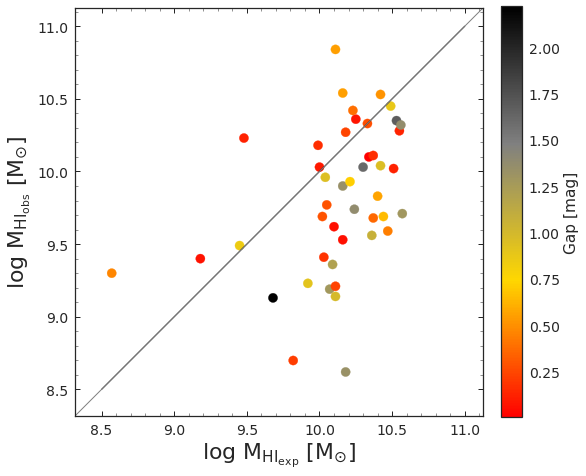

In [86]:
#Plot
#Set figure
fig = plt.figure(figsize=(8,8))                                                               
ax = fig.add_subplot(1,1,1)
#Setting tick size and direction inwards or outwards
sns.set(font_scale=1.4)
sns.set_style("ticks", {"xtick.major.size":5, "ytick.major.size":5,
                        "xtick.minor.size":3,"ytick.minor.size":3,
                       "xtick.direction": "in","ytick.direction": "in"})
#Ticks on both axis
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

#Set minor ticks spacing on axis
minor_ticks=np.arange(8.5, 12, 0.1)                                               
ax.set_xticks(minor_ticks, minor=True)
minor_ticks=np.arange(8.5, 12, 0.1)                                              
ax.set_yticks(minor_ticks, minor=True);

plt.scatter(MHI_Verdes+DEF_Verdes, MHI_Verdes, c=GAP_Verdes,  s=85, cmap=cmap, label='HCG')
x=np.array([8.5,9,10,11])
y=x
plt.plot(x,y, color='k', linewidth=1)
plt.colorbar(label='Gap [mag]', fraction=0.046, pad=0.04)
plt.ylabel(r'log M$_{\mathrm{HI}_{\mathrm{obs}}}$ [M$_{\odot}$]', fontsize=22)
plt.xlabel(r'log M$_{\mathrm{HI}_{\mathrm{exp}}}$ [M$_{\odot}$]', fontsize=22)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),]
ax.plot(lims, lims, color='grey', linestyle='-', linewidth=1)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


plt.show()

# Bokeh:

### VERY COOL and plenty Jupyter notebooks with [Bokeh](https://github.com/bokeh/bokeh-notebooks)
HCG data for these examples are as referenced above next to colourmaps.

In [65]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

I investigate relation between three properties: HI mass, HI deficiency and the GAP parameter, and here are the regular plots for that.

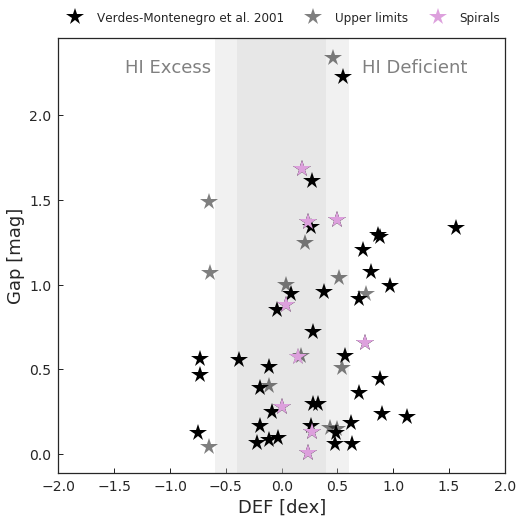

In [82]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(DEF_Verdes,GAP_Verdes, 'k*', color='k', markersize=18, label='Verdes-Montenegro et al. 2001')
ax.plot(DEF_Verdes_lim,GAP_Verdes_lim, 'k*', color='k', markersize=18, alpha=0.5, label='Upper limits')
ax.plot(DEF_Verdes_sp,GAP_Verdes_sp, 'k*', color='plum', markersize=18, label='Spirals')


a = -0.6
b = 0.6
plt.axvspan(a, b, color='lightgrey', alpha=0.3, lw=0)
plt.axvspan(a+0.2, b-0.2, color='lightgrey', alpha=0.3, lw=0)

plt.text(0.15, 0.92, 'HI Excess', color = 'grey',transform=ax.transAxes, fontsize=18)
plt.text(0.68, 0.92, 'HI Deficient', color = 'grey',transform=ax.transAxes, fontsize=18)

#Legend on top of the plot
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0, fontsize=12)

plt.ylabel('Gap [mag]', fontsize=18)
plt.xlabel('DEF [dex]', fontsize=18)
plt.xlim(-2,2)
plt.show()

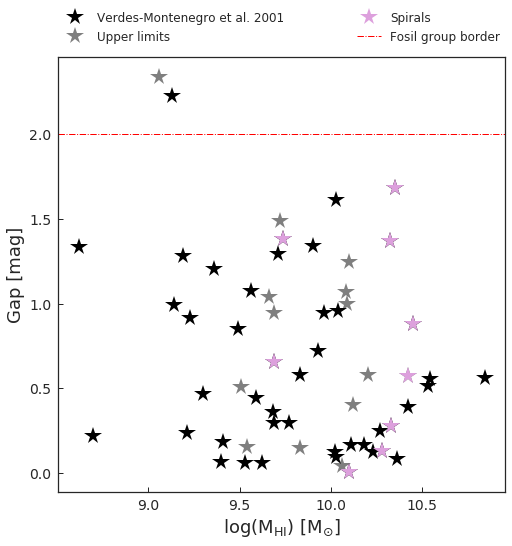

In [85]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(MHI_Verdes,GAP_Verdes, 'k*', color='k', markersize=18, label='Verdes-Montenegro et al. 2001')
ax.plot(MHI_Verdes_lim,GAP_Verdes_lim, 'k*', color='k', markersize=18, alpha = 0.5, label='Upper limits')
ax.plot(MHI_Verdes_sp,GAP_Verdes_sp, 'k*', color='plum', markersize=18, label='Spirals')

plt.axhline(2, color='red', linestyle='-.', linewidth=1, label='Fosil group border')


plt.ylabel('Gap [mag]', fontsize=18)
plt.xlabel('log(M$_{\mathrm{HI}}$) [M$_{\odot}$]', fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0, fontsize=12)
plt.show()

### Now, let's see how Bokeh can help with this analysis:

In [69]:
#Import bunch of cool stuff from Bokeh and they will do the magic
from bokeh.plotting import figure, output_file, show, ColumnDataSource, gridplot, save
from bokeh.models import HoverTool

## Linking:

In [78]:
x = DEF_Verdes+MHI_Verdes
y0, y1, y2 = MHI_Verdes, GAP_Verdes, DEF_Verdes

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1, y2=y2))

#Interactive tools
TOOLS = "box_select,lasso_select,help,pan,wheel_zoom"

# create plot and add a renderer
left = figure(tools=TOOLS, width=400, height=400)
left.circle('x', 'y0', color='black', size=8,source=source)
left.line([8.5,9,10,11], [8.5,9,10,11], line_width=1, line_color='black')
left.xaxis.axis_label = 'MHI expected'
left.yaxis.axis_label = 'MHI observed'

# create another plot and add a renderer
right = figure(tools=TOOLS, width=400, height=400)
right.circle('y1', 'y2',color='black', size=8,source=source)
right.xaxis.axis_label = 'GAP'
right.yaxis.axis_label = 'DEF'

p = gridplot([[left,right]])

show(p)

## Hover:

In [71]:
source = ColumnDataSource(
        data=dict(
            x=MHI_Verdes+DEF_Verdes,
            y=MHI_Verdes,
            desc=HCG,))

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(MHIexp, MHIobs )", "($x, $y)"),
            ("HCG group", "@desc"),
        ])

p = figure(plot_width=400, plot_height=400, tools=[hover], title="HCG")

p.circle('x', 'y', size=8, color='black', source=source)
p.line([8.5,9,10,11], [8.5,9,10,11], line_width=1, line_color='blue')

show(p)

## Another, even more awesome hover... This code needs to be optimized!

In [80]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource, gridplot, save
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=MHI_Verdes+DEF_Verdes,
            y=MHI_Verdes,
            desc=HCG,
            imgs=[
                'http://cseligman.com/text/atlas/hcg01wide.jpg',
                'http://cseligman.com/text/atlas/hcg02wide.jpg',
                'http://cseligman.com/text/atlas/hcg03wide.jpg',
                'http://cseligman.com/text/atlas/hcg05wide.jpg',
                'http://cseligman.com/text/atlas/hcg06wide.jpg',
                'http://cseligman.com/text/atlas/hcg07wide.jpg',
                'http://cseligman.com/text/atlas/hcg10wide.jpg',
                'http://cseligman.com/text/atlas/hcg15wide.jpg',
                'http://cseligman.com/text/atlas/hcg21wide.jpg',
                'http://cseligman.com/text/atlas/hcg22wide.jpg',
                'http://cseligman.com/text/atlas/hcg23wide.jpg',
                'http://cseligman.com/text/atlas/hcg25wide.jpg',
                'http://cseligman.com/text/atlas/hcg26wide.jpg',
                'http://cseligman.com/text/atlas/hcg30wide.jpg',
                'http://cseligman.com/text/atlas/hcg31wide.jpg',
                'http://cseligman.com/text/atlas/hcg33wide.jpg',
                'http://cseligman.com/text/atlas/hcg37wide.jpg',
                'http://cseligman.com/text/atlas/hcg38wide.jpg',
                'http://cseligman.com/text/atlas/hcg40wide.jpg',
                'http://cseligman.com/text/atlas/hcg42wide.jpg',
                'http://cseligman.com/text/atlas/hcg43wide.jpg',
                'http://cseligman.com/text/atlas/hcg44wide.jpg',
                'http://cseligman.com/text/atlas/hcg47wide.jpg',
                'http://cseligman.com/text/atlas/hcg49wide.jpg',
                'http://cseligman.com/text/atlas/hcg53wide.jpg',
                'http://cseligman.com/text/atlas/hcg56wide.jpg',
                'http://cseligman.com/text/atlas/hcg57wide.jpg',
                'http://cseligman.com/text/atlas/hcg58wide.jpg',
                'http://cseligman.com/text/atlas/hcg59wide.jpg',
                'http://cseligman.com/text/atlas/hcg61wide.jpg',
                'http://cseligman.com/text/atlas/hcg67wide.jpg',
                'http://cseligman.com/text/atlas/hcg68wide.jpg',
                'http://cseligman.com/text/atlas/hcg69wide.jpg',
                'http://cseligman.com/text/atlas/hcg70wide.jpg',
                'http://cseligman.com/text/atlas/hcg73wide.jpg',
                'http://cseligman.com/text/atlas/hcg79wide.jpg',
                'http://cseligman.com/text/atlas/hcg87wide.jpg',
                'http://cseligman.com/text/atlas/hcg88wide.jpg',
                'http://cseligman.com/text/atlas/hcg89wide.jpg',
                'http://cseligman.com/text/atlas/hcg91wide.jpg',
                'http://cseligman.com/text/atlas/hcg92wide.jpg',
                'http://cseligman.com/text/atlas/hcg93wide.jpg',
                'http://cseligman.com/text/atlas/hcg99wide.jpg',
                'http://cseligman.com/text/atlas/hcg100wide.jpg',
                'http://cseligman.com/text/atlas/hcg90wide.jpg'
                                                                ],))

hover = HoverTool( tooltips="""
    <div>
        <div>
            <img
                src="@imgs" height="300" alt="@imgs" width="300"
                style="float: left; margin: 0px 0px 10px 0px;"
                border="2"
            ></img>
        </div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
    """
)

p = figure(plot_width=500, plot_height=500, tools=[hover],
           title="Mouse over the dots")


p.circle('x', 'y', size=10, color='black', source=source)
p.line([8.5,9,10,11], [8.5,9,10,11], line_width=1, line_color='blue')

show(p)

## You can save the plot as the .html, and place hyperlink for example in presentation and then easily have interactive plot in case you need it :)

In [73]:
from bokeh.io import output_file, show
output_file("plot.html")
save(p)

'/home/rdzudzar/Documents/Code_review/Plots/plot.html'

# Mike drop.